In [119]:
#import necessary package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [120]:
#Load the corporate bankruptcy data
bankruptcy_df = pd.read_csv('https://raw.githubusercontent.com/sowide/bankruptcy_dataset/refs/heads/main/american_bankruptcy_dataset.csv')

In [121]:
#View first 5 rows of the corporate bankruptcy dataframe
bankruptcy_df.tail()

,company_name,fyear,status_label,X1,X2,X3,X4,X5,X6,X7,...,X11,X12,X13,X14,X15,X16,X17,X18,Division,MajorGroup
78677,C_8971,2014.0,alive,233211.0,1099101.00,43338.0,184666.000,14094.000,31521.000,45615.0,...,25261.000,28095.0,22846.0,104223.0,756.4827,225887.000,104223.0,58608.00,E,44
78678,C_8971,2015.0,alive,105559.0,1865926.00,59184.0,770.103,42592.000,159541.000,202133.0,...,129688.000,157783.0,54611.0,291153.0,527575.0000,880327.000,291153.0,89.02,E,44
78679,C_8971,2016.0,alive,63971.0,1746235.00,69074.0,683985.000,65057.000,13.994,79051.0,...,-1442.000,156341.0,42467.0,169858.0,578.8868,770.233,169858.0,90807.00,E,44
78680,C_8971,2017.0,alive,135207.0,1736.11,66527.0,694035.000,65.330,3841.000,69171.0,...,-20401.000,135941.0,27217.0,161884.0,412.6241,776697.000,161884.0,92713.00,E,44
78681,C_8971,2018.0,alive,82589.0,1625.37,68817.0,632122.000,65.201,2061.000,67262.0,...,-50.946,84995.0,45839.0,160513.0,354.1786,712687.000,160513.0,93251.00,E,44


In [122]:
bankruptcy_df.describe()

,fyear,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,MajorGroup
count,78682.000000,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,7.868200e+04,78682.000000
mean,2007.506317,2.133141e+05,5.994709e+05,3.797745e+05,1.508433e+05,2.471565e+04,4.426177e+04,6.942115e+04,1.723757e+05,5.102166e+04,1.233971e+05,1.397351e+04,4.788783e+04,6.791101e+04,5.488639e+05,4.482444e+05,3.517166e+05,5.488639e+05,4.761371e+05,45.181477
std,5.742768,7.016291e+05,2.065452e+06,2.021659e+06,7.115052e+05,9.778169e+04,2.240017e+05,2.847994e+05,6.007523e+05,2.204076e+05,4.877100e+05,1.978544e+05,8.134077e+05,2.582180e+05,2.369004e+06,5.110524e+06,1.359127e+06,2.369004e+06,2.079919e+06,19.812783
min,1999.000000,-2.498000e+03,7.000000e-03,-3.666450e+05,-2.300000e+01,0.000000e+00,-5.043795e+06,-4.512135e+06,-4.367571e+06,0.000000e+00,7.000000e-03,-1.605370e+07,-2.148494e+07,-6.000000e+00,-1.964999e+06,1.000000e-04,7.000000e-03,-1.964999e+06,-3.171970e+05,1.000000
25%,2002.000000,1.272000e+03,3.282525e+03,1.439100e+03,0.000000e+00,7.440000e+01,-7.677500e+02,-9.000000e+00,3.554325e+02,0.000000e+00,9.580750e+02,-2.636000e+03,-3.078750e+04,2.064025e+02,1.930780e+03,4.644980e+01,1.957025e+03,1.930780e+03,3.043000e+03,30.000000
50%,2007.000000,2.201650e+04,4.326650e+04,2.104450e+04,5.000000e+02,1.216000e+03,3.030000e+02,1.121900e+03,1.145950e+04,6.750000e+02,1.086600e+04,3.137400e+01,-5.985500e+00,4.106500e+03,3.281900e+04,3.727403e+02,1.798550e+04,3.281900e+04,3.701000e+04,38.000000
75%,2012.000000,1.539940e+05,3.293620e+05,1.808215e+05,1.601050e+04,1.234475e+04,1.909775e+04,3.325675e+04,1.099000e+05,1.677175e+04,6.928050e+04,8.379750e+03,2.215800e+04,3.840950e+04,2.997678e+05,3.097385e+03,1.497210e+05,2.997678e+05,2.625520e+05,59.000000
max,2018.000000,3.132258e+07,6.723494e+07,1.632456e+08,2.068708e+07,4.440438e+06,9.783515e+06,1.256672e+07,2.786440e+07,1.191851e+07,2.786969e+07,7.521731e+06,3.095666e+07,1.154206e+07,1.679396e+08,4.670929e+08,4.042171e+07,1.679396e+08,1.657008e+08,99.000000


In [123]:
# for name in bankruptcy_df['company_name'].unique():
#     company_data = bankruptcy_df[bankruptcy_df['company_name'] == name]
#     print(f"\n{name}:")
#     for year, status in zip(company_data['fyear'], company_data['status_label']):
#         print(f"  Year: {year}, Status: {status}")

Based on available data, companies are either grouped as all fail or all alive. Hence the yearly features for each company can be summarised into a row using summary stats, and financial metrics.

In [124]:
# for name in bankruptcy_df['company_name'].unique():
#     company_data = bankruptcy_df[bankruptcy_df['company_name'] == name]
#     value_count = company_data['status_label'].value_counts()
#     if len(value_count) > 1:
#         print(f"\n{name}:")
#         print(value_count)

#### LOAD OTHER DATA

In [125]:
#Read GDP data
gdp_df = pd.read_csv('https://raw.githubusercontent.com/IjezieChukwuebuka/GDP-growth-rate/refs/heads/main/GDP%20Growth%20Rate.csv')

#Read Unemployment data
unemployment_df = pd.read_csv('https://raw.githubusercontent.com/IjezieChukwuebuka/GDP-growth-rate/refs/heads/main/unemployment_rate.csv')

#Read Inflation data
inflation_df = pd.read_csv('https://raw.githubusercontent.com/IjezieChukwuebuka/GDP-growth-rate/refs/heads/main/inflation_rate.csv')

In [126]:
#View the GDP Dataframe
gdp_df.head()

,Year,GDP Growth Rate
0,1999,4.788425
1,2000,4.077586
2,2001,0.955538
3,2002,1.700447
4,2003,2.795606


In [127]:
#View the unemployment Dataframe
unemployment_df.head()

,Year,Unemployment Rate
0,1999,4.2
1,2000,4.0
2,2001,4.7
3,2002,5.8
4,2003,6.0


In [128]:
#View the inflation dataframe
inflation_df.head()

,Year,Inflation Rate
0,1999,2.2
1,2000,3.4
2,2001,2.8
3,2002,1.6
4,2003,2.3


#### DATA CLEANING AND MERGING

In [129]:
#Rename year column in Corporate bankruptcy dataframe
bankruptcy_df.rename(columns={'fyear': 'Year'}, inplace=True)


In [130]:
#Merge the Corporate Bankruptcy, GDP, Unemployment and Inflation Dataframes
bankruptcy_df = bankruptcy_df.merge(gdp_df, on='Year', how='left') \
                         .merge(unemployment_df, on='Year', how='left') \
                         .merge(inflation_df, on='Year', how='left')

In [131]:
#Convert the year column to the integer datatype
bankruptcy_df['Year'] = bankruptcy_df['Year'].astype(int)

In [132]:
#View information on bankruptcy dataframe
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       78682 non-null  object 
 1   Year               78682 non-null  int64  
 2   status_label       78682 non-null  object 
 3   X1                 78682 non-null  float64
 4   X2                 78682 non-null  float64
 5   X3                 78682 non-null  float64
 6   X4                 78682 non-null  float64
 7   X5                 78682 non-null  float64
 8   X6                 78682 non-null  float64
 9   X7                 78682 non-null  float64
 10  X8                 78682 non-null  float64
 11  X9                 78682 non-null  float64
 12  X10                78682 non-null  float64
 13  X11                78682 non-null  float64
 14  X12                78682 non-null  float64
 15  X13                78682 non-null  float64
 16  X14                786

In [133]:
#Rename columns
bankruptcy_df.rename(columns={
    'X1':'current_assets',
    'X2':'cost_of_goods_sold',
    'X3':'depreciation _and_amortization',
    'X4':'ebitda',
    'X5':'inventory',
    'X6':'net_income',
    'X7':'total_receivables',
    'X8':'market_value',
    'X9':'net_sales',
    'X10':'total_assets',
    'X11':'total_long_term_debt',
    'X12':'ebit',
    'X13':'gross_profit',
    'X14':'total_current_liabilities',
    'X15':'retained_earnings',
    'X16':'total_revenue',
    'X17':'total_liabilities',
    'X18':'total_operating_expenses'}, inplace = True)

In [134]:
#Mapping each division code to its full name
division_map = {
    'A': 'Agriculture, Forestry, And Fishing',
    'B': 'Mining',
    'C': 'Construction',
    'D': 'Manufacturing',
    'E': 'Transportation, Communications, Electric, Gas, And Sanitary Services',
    'F': 'Wholesale Trade',
    'G': 'Retail Trade',
    'H': 'Finance, Insurance, And Real Estate',
    'I': 'Services',
    'J': 'Public Administration'
}

#Replace the Division codes with  Division full names
bankruptcy_df['Division'] = bankruptcy_df['Division'].replace(division_map)


#### FEATURE ENGINEERING

In [170]:
def feature_engineering(df):
    """
    Perform feature engineering on financial time series data by company.

    Parameters:
    df (pd.DataFrame): Long-format company-year panel data

    Returns:
    pd.DataFrame: Wide-format data with company-level engineered features
    """

    df_copy = df.copy()

    # List of financial and macro metrics
    financial_metrics = [
        'net_income', 'total_revenue', 'total_operating_expenses', 'ebit',
        'ebitda', 'market_value', 'total_long_term_debt', 'retained_earnings',
        'total_receivables', 'cost_of_goods_sold', 'depreciation _and_amortization',
        'inventory', 'net_sales', 'total_assets', 'gross_profit',
        'total_liabilities', 'current_assets', 'total_current_liabilities'
    ]
    macro_economic_variables = ['GDP Growth Rate', 'Unemployment Rate', 'Inflation Rate']

    # Aggregation functions
    agg_funcs = ['mean', 'std', 'min', 'max', 'first', 'last']
    agg_dict = {col: agg_funcs for col in financial_metrics}
    agg_dict['Division'] = ['last']
    agg_dict['status_label'] = ['last']
    agg_dict['GDP Growth Rate'] = ['mean', 'std', 'first', 'last']
    agg_dict['Unemployment Rate'] = ['mean', 'std', 'first', 'last']
    agg_dict['Inflation Rate'] = ['mean', 'std', 'first', 'last']

    #Temporal statistics - This is to inform the model the lenght of years of data available for each company
    temporal_stats = df_copy.groupby('company_name').agg(
        num_years_observed=('Year', 'nunique'),
        year_start=('Year', 'min'),
        year_end=('Year', 'max'))

    temporal_stats['observation_span'] = temporal_stats['year_end'] - temporal_stats['year_start']
    temporal_stats['is_short_history'] = (temporal_stats['num_years_observed'] <= 2).astype(int)

    #Aggregation
    grouped = df_copy.groupby('company_name').agg(agg_dict)

    # Flatten MultiIndex column names
    grouped.columns = ['_'.join(col).strip() for col in grouped.columns]
    grouped = grouped.reset_index()

    #Delta and Range Features
    for col in financial_metrics:
        grouped[f'{col}_range'] = grouped[f'{col}_max'] - grouped[f'{col}_min']
        grouped[f'{col}_delta'] = grouped[f'{col}_last'] - grouped[f'{col}_first']

    for col in macro_economic_variables:
        grouped[f'{col}_delta'] = grouped[f'{col}_last'] - grouped[f'{col}_first']

    #Liquidity Ratios
    grouped['current_ratio'] = grouped['current_assets_mean'] / grouped['total_current_liabilities_mean']
    grouped['quick_ratio'] = (grouped['current_assets_mean'] - grouped['inventory_mean']) / grouped['total_current_liabilities_mean']

    #Market-Based Ratios
    grouped['market_to_book'] = grouped['market_value_mean'] / (
        grouped['total_assets_mean'] - grouped['total_liabilities_mean'])
    grouped['price_to_sales'] = grouped['market_value_mean'] / grouped['net_sales_mean']
    grouped['price_to_earnings'] = grouped['market_value_mean'] / grouped['net_income_mean']

    #Merge temporal stats
    grouped = grouped.merge(temporal_stats.reset_index(), on='company_name', how='left')

    #Cleanup
    grouped.replace([np.inf, -np.inf], np.nan, inplace=True)
    grouped.fillna(0, inplace=True)
    for i in financial_metrics:
        grouped.drop(columns=[f'{i}_first', f'{i}_min', f'{i}_max', f'{i}_last'], inplace=True)

    for i in macro_economic_variables:
        grouped.drop(columns=[f'{i}_first', f'{i}_last'], inplace=True)

    grouped.drop(columns=['year_start', 'year_end'], inplace=True)

    grouped.rename(columns={
        'status_label_last': 'status_label',
        'Division_last': 'Division'
    }, inplace=True)

    return grouped


#### APPLY FEATURE ENGINEERING

In [136]:
bankruptcy_df = feature_engineering(bankruptcy_df)
bankruptcy_df.head()

,company_name,net_income_mean,net_income_std,total_revenue_mean,total_revenue_std,total_operating_expenses_mean,total_operating_expenses_std,ebit_mean,ebit_std,ebitda_mean,...,Unemployment Rate_delta,Inflation Rate_delta,current_ratio,quick_ratio,market_to_book,price_to_sales,price_to_earnings,num_years_observed,observation_span,is_short_history
0,C_1,33774.558947,47146.306559,3.511352e+05,3.805992e+05,5.642824e+05,5.717516e+05,1.555385e+05,1.781205e+05,1.768478e+05,...,0.2,-0.1,0.692800,0.665533,-0.218408,0.465209,3.071270,19,18,0
1,C_10,502428.305700,354880.379728,6.975959e+06,3.709215e+06,2.139320e+06,6.176019e+05,1.242635e+06,7.448201e+05,2.808140e+06,...,-0.3,0.2,0.273846,0.124413,-0.580400,6.252119,1.858332,20,19,0
2,C_100,10988.252800,9948.740019,1.196841e+04,1.109425e+04,2.879628e+04,2.758270e+04,1.184253e+05,1.096664e+05,9.666667e-01,...,3.2,-0.7,0.652597,0.489583,-0.822499,23.095353,2.960661,15,14,0
3,C_1000,407182.343500,592993.751569,1.301762e+06,1.891451e+06,2.309622e+06,2.178123e+06,2.205339e+06,2.423774e+06,3.038636e+05,...,-0.3,0.2,0.481168,0.452896,-1.156318,9.796832,4.123760,20,19,0
4,C_1001,1883.430000,1096.193766,2.532189e+04,1.540796e+04,1.137516e+05,5.481714e+04,6.654100e+03,3.548667e+03,3.668255e+03,...,-0.3,0.2,0.193760,0.190633,-0.067911,0.657687,3.470668,20,19,0


#### DATA EXPLORATION

In [137]:
bankruptcy_df.describe()

,net_income_mean,net_income_std,total_revenue_mean,total_revenue_std,total_operating_expenses_mean,total_operating_expenses_std,ebit_mean,ebit_std,ebitda_mean,ebitda_std,...,Unemployment Rate_delta,Inflation Rate_delta,current_ratio,quick_ratio,market_to_book,price_to_sales,price_to_earnings,num_years_observed,observation_span,is_short_history
count,8.971000e+03,8.971000e+03,8.971000e+03,8.971000e+03,8.971000e+03,8.971000e+03,8.971000e+03,8.971000e+03,8.971000e+03,8.971000e+03,...,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8.971000e+03,8.971000e+03,8971.000000,8971.000000,8971.000000
mean,2.359212e+04,4.021333e+04,2.632367e+05,1.983547e+05,3.388685e+05,2.375854e+05,-5.144431e+03,1.341457e+05,1.148772e+05,1.038955e+05,...,0.335358,0.012362,122.227402,116.966604,1.020709,-3.594323e+03,4.232734e+02,8.770706,7.977037,0.185152
std,1.232017e+05,1.185736e+05,8.548327e+05,6.746354e+05,1.207580e+06,9.633980e+05,5.025579e+05,4.008068e+05,4.310128e+05,3.855123e+05,...,2.157161,1.102017,5206.836473,5155.173470,246.505031,4.110519e+05,3.550102e+04,6.421565,6.519273,0.388443
min,-2.137012e+06,0.000000e+00,4.000000e-02,0.000000e+00,-1.582284e+05,0.000000e+00,-1.985829e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.700000,-4.200000,-0.116643,-10227.272727,-10017.073171,-3.846410e+07,-8.082907e+04,1.000000,0.000000,0.000000
25%,-3.845047e+03,1.528237e+03,6.695392e+03,2.647413e+03,1.322718e+04,4.396484e+03,-5.923019e+04,5.368655e+03,1.214643e+02,4.322253e+01,...,-0.300000,-0.600000,0.296102,0.228842,-0.806732,0.000000e+00,-4.783715e-01,3.000000,2.000000,0.000000
50%,2.400667e+02,7.559070e+03,2.900550e+04,1.480451e+04,5.791640e+04,2.918754e+04,-6.813749e+03,2.797783e+04,2.971475e+03,2.215937e+03,...,0.000000,0.200000,0.511568,0.442693,-0.434491,1.808165e+00,1.555703e+00,7.000000,6.000000,0.000000
75%,1.635968e+04,2.896410e+04,1.665824e+05,1.011474e+05,2.470835e+05,1.408502e+05,1.691042e+04,1.039121e+05,4.383984e+04,4.212561e+04,...,1.300000,0.700000,1.073412,0.952140,-0.184226,5.642264e+00,4.458202e+00,14.000000,13.000000,0.000000
max,3.906707e+06,3.163536e+06,2.328936e+07,1.440319e+07,4.764659e+07,5.117942e+07,7.152446e+06,1.053402e+07,9.089153e+06,9.063139e+06,...,5.600000,3.600000,475186.666667,471666.666667,15151.507889,3.823354e+06,3.356200e+06,20.000000,19.000000,1.000000


In [138]:
#Descriptive statistics of data
desc_stats = bankruptcy_df.describe(include='all').transpose()
desc_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_name,8971,8971,C_999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
net_income_mean,8971.0,NaN,NaN,NaN,23592.119149,123201.688384,-2137012.0,-3845.046812,240.066667,16359.6758,3906706.6
net_income_std,8971.0,NaN,NaN,NaN,40213.334111,118573.610177,0.0,1528.236872,7559.069517,28964.096916,3163535.703786
total_revenue_mean,8971.0,NaN,NaN,NaN,263236.74505,854832.657711,0.04,6695.391571,29005.5,166582.402111,23289362.962
total_revenue_std,8971.0,NaN,NaN,NaN,198354.717586,674635.398609,0.0,2647.412953,14804.513804,101147.427911,14403187.307034
...,...,...,...,...,...,...,...,...,...,...,...
price_to_sales,8971.0,NaN,NaN,NaN,-3594.322785,411051.877222,-38464096.571429,0.0,1.808165,5.642264,3823353.714286
price_to_earnings,8971.0,NaN,NaN,NaN,423.273412,35501.022577,-80829.065074,-0.478372,1.555703,4.458202,3356200.0
num_years_observed,8971.0,NaN,NaN,NaN,8.770706,6.421565,1.0,3.0,7.0,14.0,20.0
observation_span,8971.0,NaN,NaN,NaN,7.977037,6.519273,0.0,2.0,6.0,13.0,19.0


In [139]:
#Check for null values in the data
bankruptcy_df.isnull().sum()

,0
company_name,0
net_income_mean,0
net_income_std,0
total_revenue_mean,0
total_revenue_std,0
...,...
price_to_sales,0
price_to_earnings,0
num_years_observed,0
observation_span,0


In [140]:
#Count of status_label
bankruptcy_df['status_label'].value_counts()

,count
status_label,
alive,8362
failed,609


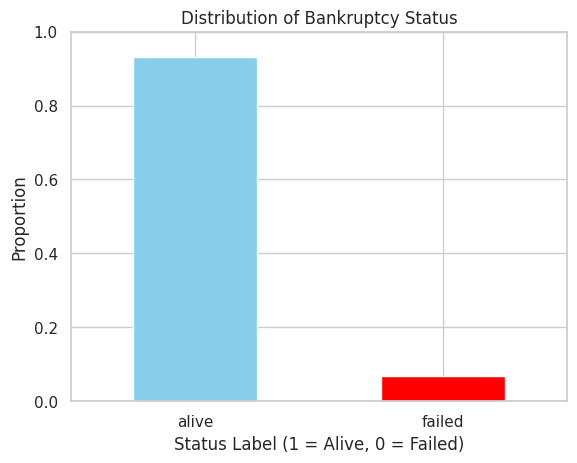

In [141]:
#Import necessary package
import matplotlib.pyplot as plt

# Get the value counts of the bankruptcy status
label_counts = bankruptcy_df['status_label'].value_counts(normalize=True)

# Plot data
label_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Distribution of Bankruptcy Status')
plt.xlabel('Status Label (1 = Alive, 0 = Failed)')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()


<ipython-input-142-8ed12c9c47c9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bankruptcy_df, y='Division', order=bankruptcy_df['Division'].value_counts().index, palette='viridis')


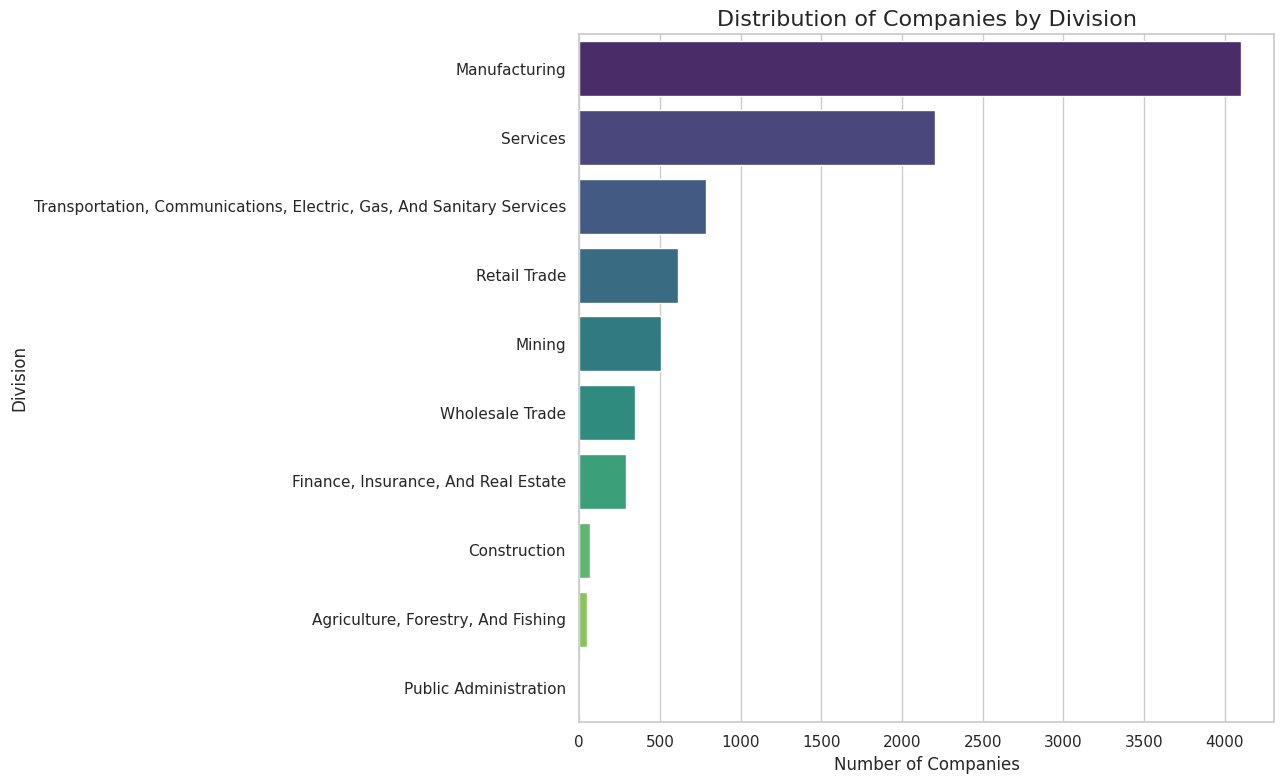

In [142]:
#Set the style for the plot
sns.set(style="whitegrid")

#Set the figure size
plt.figure(figsize=(13, 8))

# Plot the count of companies in each Division
sns.countplot(data=bankruptcy_df, y='Division', order=bankruptcy_df['Division'].value_counts().index, palette='viridis')

#Add tthe itle and axis labels
plt.title('Distribution of Companies by Division', fontsize=16)
plt.xlabel('Number of Companies', fontsize=12)
plt.ylabel('Division', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


#### CONVERT STRING TARGET LABELS TO NUMERIC

In [143]:
#Convert categorical target variable 'status_label' to numeric values: alive = 1, failed = 0
bankruptcy_df['status_label'] = bankruptcy_df['status_label'].map({'alive': 1, 'failed': 0})

#### SPLIT DATA INTO TRAIN AND TEST

In [144]:
X = bankruptcy_df.drop(columns=['status_label'])
y = bankruptcy_df['status_label']

bankruptcy_X_train, bankruptcy_X_test, bankruptcy_y_train, bankruptcy_y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [145]:
bankruptcy_X_train.columns

Index(['company_name', 'net_income_mean', 'net_income_std',
       'total_revenue_mean', 'total_revenue_std',
       'total_operating_expenses_mean', 'total_operating_expenses_std',
       'ebit_mean', 'ebit_std', 'ebitda_mean', 'ebitda_std',
       'market_value_mean', 'market_value_std', 'total_long_term_debt_mean',
       'total_long_term_debt_std', 'retained_earnings_mean',
       'retained_earnings_std', 'total_receivables_mean',
       'total_receivables_std', 'cost_of_goods_sold_mean',
       'cost_of_goods_sold_std', 'depreciation _and_amortization_mean',
       'depreciation _and_amortization_std', 'inventory_mean', 'inventory_std',
       'net_sales_mean', 'net_sales_std', 'total_assets_mean',
       'total_assets_std', 'gross_profit_mean', 'gross_profit_std',
       'total_liabilities_mean', 'total_liabilities_std',
       'current_assets_mean', 'current_assets_std',
       'total_current_liabilities_mean', 'total_current_liabilities_std',
       'Division', 'GDP Growth Rate

In [147]:
bankruptcy_y_train.value_counts()

,count
status_label,
1,5853
0,426


#### PERFORM CORRELATION MATRIX

In [148]:
#Combine data to perform analysis
df_combined = pd.concat([bankruptcy_X_train, bankruptcy_y_train], axis=1)

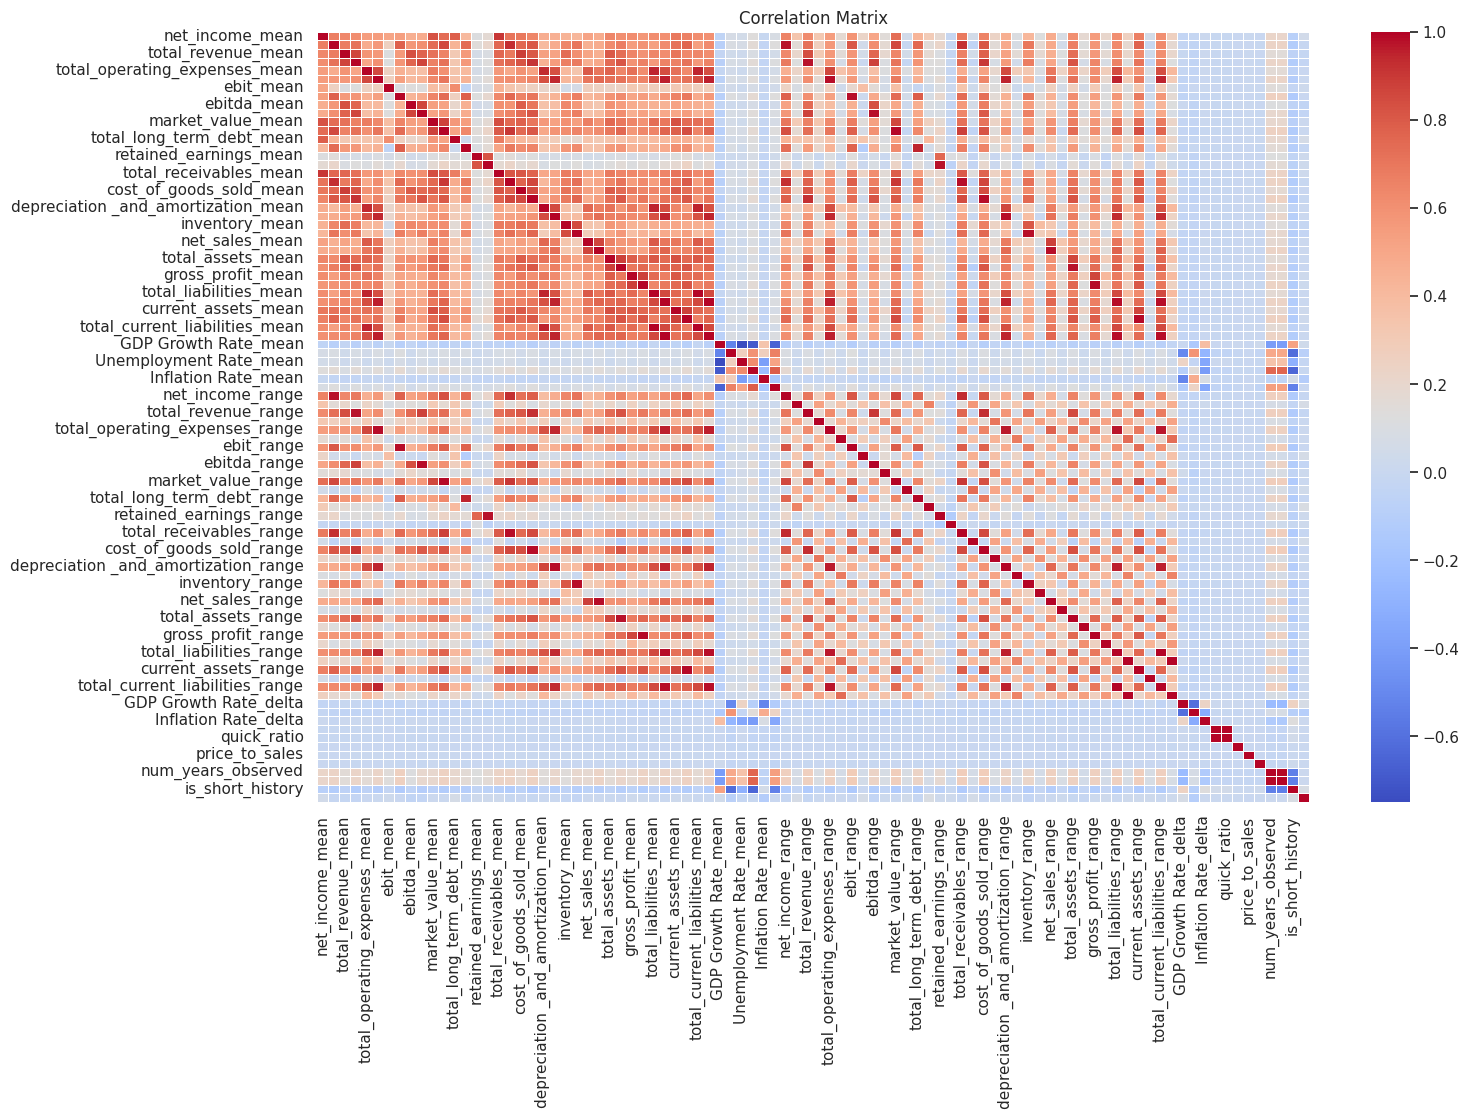

In [149]:
#Import necessary library
import seaborn as sns

#Make a copy of the data
df_corr = df_combined.copy()


#Select only numeric columns for correlation analysis
numeric_df = df_corr.select_dtypes(include=['number'])

#Check the correlation matrix
correlation_matrix = numeric_df.corr()

#Plot the correlation
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Variables exhibit levesl of multicollinearity. Hence, non linear models will suffice in modelling the data

#### ONE HOT ENCODING FUNCTION

In [150]:
def one_hot_encode(df, column_name):
    """
    One-Hot Encodes a categorical column using pandas.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column_name (str): Name of the categorical column to encode.

    Returns:
        pd.DataFrame: DataFrame with original column replaced by one-hot encoded columns.
    """
    # Generate one-hot encoded columns
    one_hot = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop original column and concatenate new one-hot columns
    df = df.drop(column_name, axis=1)
    df = pd.concat([df, one_hot], axis=1)

    return df

## PERFORM CROSS VALIDATION ON DATASET

In [151]:

models = []
models.append(('XGBOOST', XGBClassifier(scale_pos_weight=1)))
models.append(('SUPPORT VC', SVC(class_weight='balanced')))
models.append(('RANDOM FOREST', RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=5, random_state=42, class_weight='balanced')))
models.append(('DECISION TREE', DecisionTreeClassifier(class_weight='balanced')))

#scoring
precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')

In [152]:
# Prepare the data
X = bankruptcy_X_train.drop(columns=['company_name']) # Major Group is same as Division
X = one_hot_encode(X, 'Division')
y = bankruptcy_y_train


names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    tscv = TimeSeriesSplit(n_splits=10)
    #create pipeline
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
    ('classifier', model)])
    # Evaluate the model using cross-validation
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring=f1)
    kfold_results.append(cv_results)
    msg = f"{name}: Average f1: {cv_results.mean():.4f} (f1 std: {cv_results.std():.4f})"
    print(msg)



XGBOOST: Average f1: 0.5545 (f1 std: 0.0451)
SUPPORT VC: Average f1: 0.3630 (f1 std: 0.1565)
RANDOM FOREST: Average f1: 0.6000 (f1 std: 0.0426)
DECISION TREE: Average f1: 0.5638 (f1 std: 0.0357)


Best model so far is random forest. So we model tune to obtain the best hyperparameters

#### EVALUATE CROSS VALIDATION RESULT

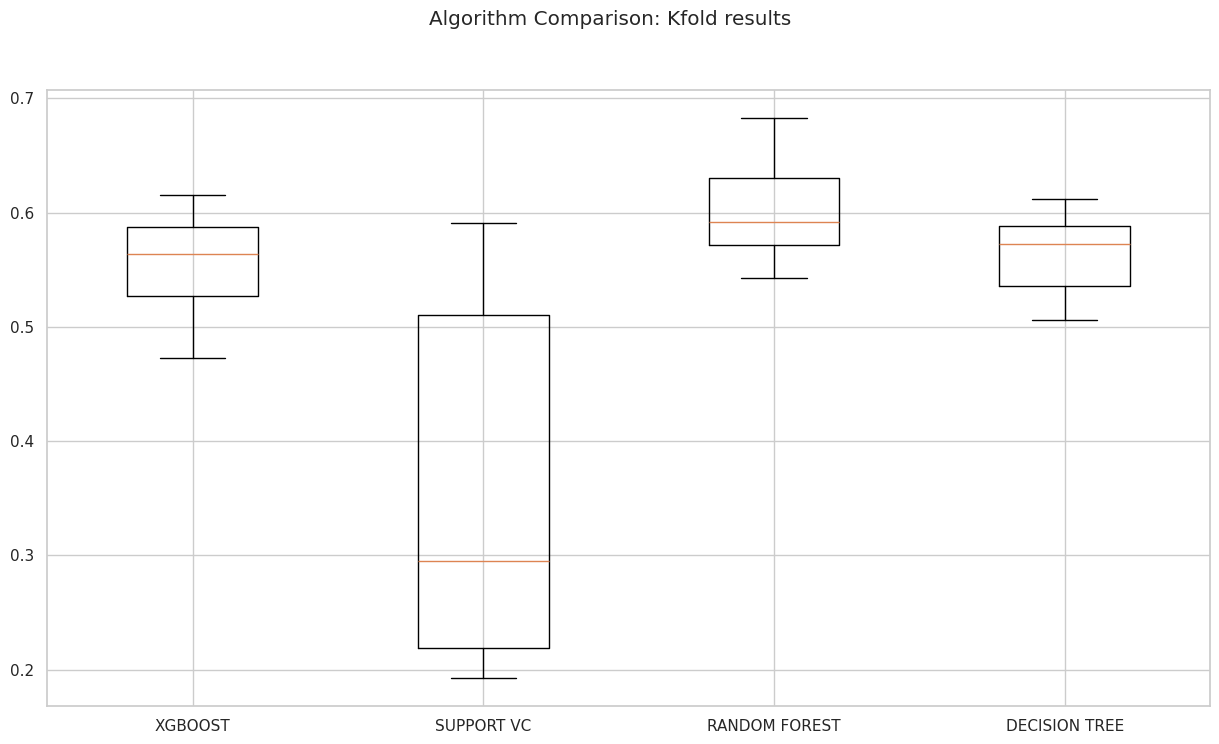

In [153]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

#### MODEL TUNING

#### RANDOM FOREST

In [154]:
# Prepare the data
X = bankruptcy_X_train.drop(columns=['company_name']) # Major Group is same as Division
X = one_hot_encode(X, 'Division')
y = bankruptcy_y_train

#RANDOMFOREST
param_grid = {
    'classifier__n_estimators': [1, 5, 10, 20, 50],
    'classifier__max_depth': [1, 5, 10, 15, 20],
    'classifier__criterion': ["gini", "entropy"]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, sampling_strategy=0.3)),
    ('classifier', RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42))])
cv = StratifiedKFold(n_splits=10)
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1, cv=cv)
grid_result = grid.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.634399 using {'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__n_estimators': 50}


#### COMPLETE MODEL BUILDING AND TESTING WITH UNSEEN TEST SET

#### RANDOM FOREST (ALL FEATURES)

In [156]:
# Prepare the data
X = bankruptcy_X_train.drop(columns=['company_name']) # Major Group is same as Division
X = one_hot_encode(X, 'Division')
y = bankruptcy_y_train

#prepare test data
X_test = bankruptcy_X_test.drop(columns=['company_name']) # Major Group is same as Division
X_test = one_hot_encode(X_test, 'Division')
y_test = bankruptcy_y_test

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#apply SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_scaled, y)


#train model
rf = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5, random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nMacro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

Accuracy Score: 0.7574294205052006

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.69      0.28       183
           1       0.97      0.76      0.85      2509

    accuracy                           0.76      2692
   macro avg       0.57      0.73      0.57      2692
weighted avg       0.92      0.76      0.82      2692


Confusion Matrix:
[[ 126   57]
 [ 596 1913]]

Macro Precision: 0.5728
Macro Recall: 0.7255
Macro F1 Score: 0.5663


A high recall means the model is catching most of the actual positives. Achieving a high recall is synonymous to saying 'I want to catch as many failing companies as possible, even if it means some false alarms'.

The correct predictions are along the diagonals of the confusion matrix.

#### FEATURE IMPORTANCE

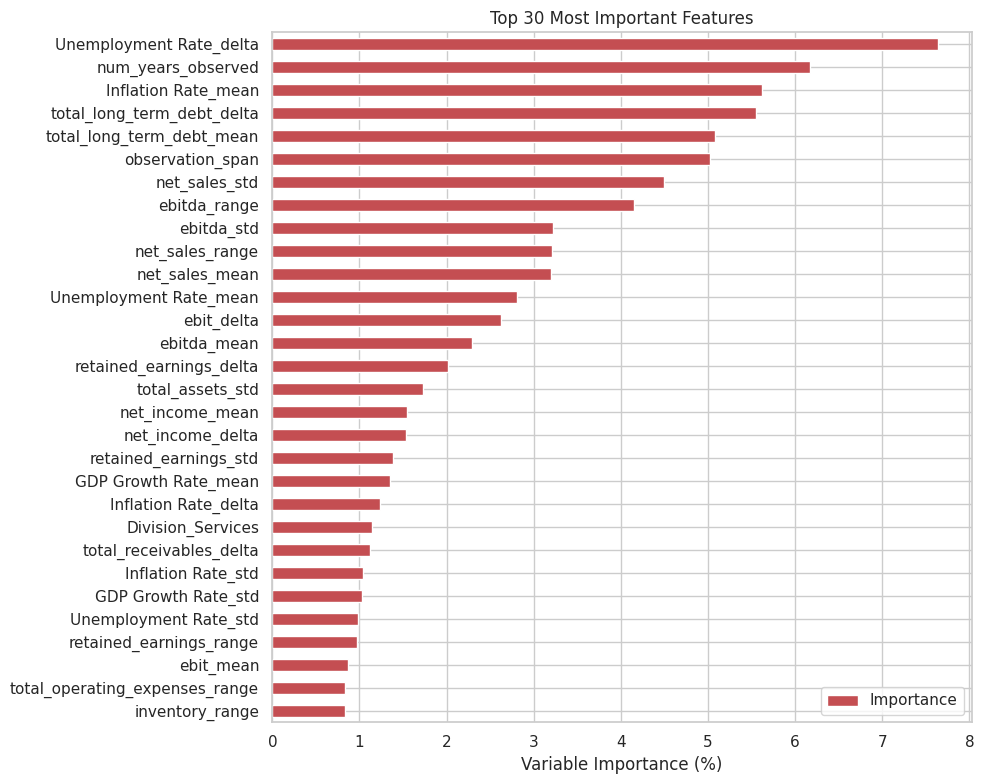

In [158]:
# threshold = 2  # Only keep features with importance > 0.5%
# Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X.columns)
# filtered = Importance[Importance['Importance'] > threshold]
# filtered.sort_values('Importance', ascending=True).plot(kind='barh', color='r', figsize=(10, 6))
# plt.xlabel('Variable Importance')
# plt.title(f'Features With Importance > {threshold}%')
# plt.tight_layout()
# plt.show()

Importance = pd.DataFrame({'Importance': rf.feature_importances_ * 100}, index=X.columns)
# Select top 30 features
top_features = Importance.sort_values('Importance', ascending=False).head(30)
top_features.sort_values('Importance').plot(kind='barh', color='r', figsize=(10, 8))
plt.xlabel('Variable Importance (%)')
plt.title('Top 30 Most Important Features')
plt.tight_layout()
plt.show()

Out of 94 features analysed, Unemployement delta, Unemployment Rate mean, Inflation Rate mean, GDP and Growth Rate mean are among the top 20 features that influence a company's bankrupty.

In [159]:
#top features
top_features = Importance.sort_values('Importance', ascending=False).head(30)
top_feature_names = top_features.index.tolist()
print(top_feature_names)

['Unemployment Rate_delta', 'num_years_observed', 'Inflation Rate_mean', 'total_long_term_debt_delta', 'total_long_term_debt_mean', 'observation_span', 'net_sales_std', 'ebitda_range', 'ebitda_std', 'net_sales_range', 'net_sales_mean', 'Unemployment Rate_mean', 'ebit_delta', 'ebitda_mean', 'retained_earnings_delta', 'total_assets_std', 'net_income_mean', 'net_income_delta', 'retained_earnings_std', 'GDP Growth Rate_mean', 'Inflation Rate_delta', 'Division_Services', 'total_receivables_delta', 'Inflation Rate_std', 'GDP Growth Rate_std', 'Unemployment Rate_std', 'retained_earnings_range', 'ebit_mean', 'total_operating_expenses_range', 'inventory_range']


#### APPLY SELECTED FEATURES: RANDOM FOREST





In [169]:
# Prepare the data
X = bankruptcy_X_train.drop(columns=['company_name']) # Major Group is same as Division
X = one_hot_encode(X, 'Division')
X = X[top_feature_names]
y = bankruptcy_y_train

#prepare test data
X_test = bankruptcy_X_test.drop(columns=['company_name']) # Major Group is same as Division
X_test = one_hot_encode(X_test, 'Division')
X_test = X_test[top_feature_names]
y_test = bankruptcy_y_test

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#apply SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_scaled, y)


#train model
rf = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5, random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nMacro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

Accuracy Score: 0.7726597325408618

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.67      0.29       183
           1       0.97      0.78      0.86      2509

    accuracy                           0.77      2692
   macro avg       0.58      0.72      0.57      2692
weighted avg       0.92      0.77      0.83      2692


Confusion Matrix:
[[ 122   61]
 [ 551 1958]]

Macro Precision: 0.5755
Macro Recall: 0.7235
Macro F1 Score: 0.5749


#### XGBOOST

In [167]:
# Prepare the data
X = bankruptcy_X_train.drop(columns=['company_name']) # Major Group is same as Division
X = one_hot_encode(X, 'Division')
#X = X[top_feature_names]
y = bankruptcy_y_train

#prepare test data
X_test = bankruptcy_X_test.drop(columns=['company_name']) # Major Group is same as Division
X_test = one_hot_encode(X_test, 'Division')
#X_test = X_test[top_feature_names]
y_test = bankruptcy_y_test

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#apply SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_scaled, y)
scale_pos_weight = sum(y == 1) / sum(y == 0)


#train model
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight,objective='binary:logistic',eval_metric='aucpr')
xgb.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = xgb.predict(X_test_scaled)

# Evaluate the model
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nMacro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

Accuracy Score: 0.9331352154531947

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.17      0.26       183
           1       0.94      0.99      0.96      2509

    accuracy                           0.93      2692
   macro avg       0.73      0.58      0.61      2692
weighted avg       0.91      0.93      0.92      2692


Confusion Matrix:
[[  32  151]
 [  29 2480]]

Macro Precision: 0.7336
Macro Recall: 0.5817
Macro F1 Score: 0.6136


A high precision means the model doesn't raise many false alarms. Optimizing for high precision is synonymous to saying; "I want to be very confident when I say a company will fail."

Model class predictions are along the diagonals of the confusion matrix. The XGBOOST performs poorly in predicting the minority class (failed), while producing stellar result on the majority class.

#### One - Clas SVM (Anomaly Detection technique)

In [166]:
from sklearn.svm import OneClassSVM
import numpy as np

# Prepare the data
X = bankruptcy_X_train.drop(columns=['company_name']) # Major Group is same as Division
X = one_hot_encode(X, 'Division')
#X = X[top_feature_names]
y = bankruptcy_y_train

# Train only on "alive" companies (majority class)
X_alive = X[y == 1]

#prepare test data
X_test = bankruptcy_X_test.drop(columns=['company_name']) # Major Group is same as Division
X_test = one_hot_encode(X_test, 'Division')
#X_test = X_test[top_feature_names]
y_test = bankruptcy_y_test

# Standardize the features
scaler = StandardScaler()
X_alive_scaled = scaler.fit_transform(X_alive)
X_test_scaled = scaler.transform(X_test)


# Train One-Class SVM (adjust 'nu' = expected failure rate)
oc_svm = OneClassSVM(nu=0.8)
oc_svm.fit(X_alive_scaled)

# Predict anomalies (-1 = failed, 1 = alive)
predictions = oc_svm.predict(X_test_scaled)

# Convert predictions to binary (1=alive, 0=failed)
y_pred = np.where(predictions == 1, 1, 0)

# Evaluate the model
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\nMacro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")

Accuracy Score: 0.2514858841010401

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.77      0.12       183
           1       0.93      0.21      0.35      2509

    accuracy                           0.25      2692
   macro avg       0.50      0.49      0.23      2692
weighted avg       0.87      0.25      0.33      2692


Confusion Matrix:
[[ 140   43]
 [1972  537]]

Macro Precision: 0.4961
Macro Recall: 0.4895
Macro F1 Score: 0.2348


#### STACKING MODELS

In [165]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = bankruptcy_X_train.drop(columns=['company_name']) # Major Group is same as Division
X = one_hot_encode(X, 'Division')
#X = X[top_feature_names]
y = bankruptcy_y_train

#prepare test data
X_test = bankruptcy_X_test.drop(columns=['company_name']) # Major Group is same as Division
X_test = one_hot_encode(X_test, 'Division')
#X_test = X_test[top_feature_names]
y_test = bankruptcy_y_test

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

#apply SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_scaled, y)

#instantiate classifiers
rf = RandomForestClassifier(n_estimators=100,max_depth=5,class_weight="balanced", random_state=42)
xgb = XGBClassifier(n_estimators=100,max_depth=3,scale_pos_weight=sum(y == 1)/sum(y == 0),  eval_metric='logloss',random_state=42)

#Get out-of-fold CLASS predictions from base models
oof_rf_pred = cross_val_predict(rf, X_train_smote, y_train_smote, cv=5, method='predict', n_jobs=-1)
oof_xgb_pred = cross_val_predict(xgb, X_train_smote, y_train_smote,cv=5, method='predict', n_jobs=-1)

#Create meta-features matrix (using class predictions)
X_meta_train = np.column_stack([oof_rf_pred, oof_xgb_pred])

#Train meta-model (Logistic Regression)
meta_model = LogisticRegression(class_weight="balanced",solver='lbfgs',max_iter=1000)
meta_model.fit(X_meta_train, y_train_smote)

#train base models on full data
rf.fit(X_train_smote, y_train_smote)
xgb.fit(X_train_smote, y_train_smote)

#Generate test set predictions
test_rf_pred = rf.predict(X_test_scaled)
test_xgb_pred = xgb.predict(X_test_scaled)
X_meta_test = np.column_stack([test_rf_pred, test_xgb_pred])

#Make final predictions
final_pred = meta_model.predict(X_meta_test)

#Evaluate
# Evaluate the model
precision_macro = precision_score(y_test, final_pred, average='macro')
recall_macro = recall_score(y_test, final_pred, average='macro')
f1_macro = f1_score(y_test, final_pred, average='macro')

print("Accuracy Score:", accuracy_score(y_test, final_pred))
print("Meta-model coefficients (RF, XGB):", meta_model.coef_[0])
print("\nClassification Report:")
print(classification_report(y_test, final_pred, target_names=["Failed", "Alive"]))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_pred))
print(f"\nMacro Precision: {precision_macro:.4f}")
print(f"Macro Recall: {recall_macro:.4f}")
print(f"Macro F1 Score: {f1_macro:.4f}")


Accuracy Score: 0.7786032689450223
Meta-model coefficients (RF, XGB): [2.52252331 3.81803619]

Classification Report:
              precision    recall  f1-score   support

      Failed       0.19      0.68      0.30       183
       Alive       0.97      0.79      0.87      2509

    accuracy                           0.78      2692
   macro avg       0.58      0.73      0.58      2692
weighted avg       0.92      0.78      0.83      2692


Confusion Matrix:
[[ 125   58]
 [ 538 1971]]

Macro Precision: 0.5800
Macro Recall: 0.7343
Macro F1 Score: 0.5821


The stacking classisfier seems to outperform the others